# Chasen Shaw
## FieldLevel Project

In [1]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
from datetime import datetime
import calendar
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))
from pytz import timezone
import pytz
from dateutil import tz

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_emails = pd.read_csv('/Users/chasenshaw/Documents/fieldlevel-datascience-internship-take-home-main/data/email_data.csv',delimiter=',')

df_activity = pd.read_csv('/Users/chasenshaw/Documents/fieldlevel-datascience-internship-take-home-main/data/activity_data.csv',delimiter=',')

# Problem 1
## Rows in number of emails

In [66]:
print("The numbers of rows in df_emails is ",len(df_emails)," and the number of rows in df_activities is ",len(df_activity))

The numbers of rows in df_emails is  474163  and the number of rows in df_activities is  4559973


## So that's the number of rows, but how many emails were really sent? 

In [87]:
int(len(df_emails)*(100/3))

15805433

# Problem 2

In [221]:
def timePST(utc,intro):
    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz('Pacific/Kiritimati')
    utc = utc.replace(tzinfo=from_zone)
    central = utc.astimezone(to_zone)
    print(intro,"Time (PST): ",central)

In [222]:
Pr1=df_emails
Pr1['EmailSentDateTimeUtc']=pd.to_datetime(Pr1['EmailSentDateTimeUtc'])
Pr1_2=Pr1.sort_values(by='EmailSentDateTimeUtc',ignore_index=True).drop_duplicates(subset="UserId",ignore_index=True)
timePST(Pr1_2.EmailSentDateTimeUtc[1],"Earliest")
timePST(Pr1_2.EmailSentDateTimeUtc[len(Pr1_2)-1],"Latest")

Earliest Time (PST):  2018-01-05 02:51:07.807000+14:00
Latest Time (PST):  2021-04-20 03:45:02.670000+14:00


# Problem 3

In [5]:
df2=df_emails
df2_2=df2[["EmailSentDateTimeUtc","UserId","ZipCode"]]
df3_2=df_activity
df3_3=df3_2[["UserId","DateOfActivityPST"]]
df3=pd.merge(df2_2,df3_2,on='UserId')
df3=df3.dropna()
df3

,EmailSentDateTimeUtc,UserId,ZipCode,DateOfActivityPST,ActivityCount
2880,2019-08-18 02:16:37.580,700710988210,36104.000,2018-01-31,2
2881,2019-08-18 02:16:37.580,700710988210,36104.000,2018-02-06,26
2882,2019-08-18 02:16:37.580,700710988210,36104.000,2018-02-22,1
2883,2019-08-18 02:16:37.580,700710988210,36104.000,2018-02-27,320
2884,2019-08-18 02:16:37.580,700710988210,36104.000,2018-03-01,117
...,...,...,...,...,...
45868725,2021-04-08 16:49:23.040,906354699455,49649.000,2021-04-01,84
45868726,2021-04-08 16:49:23.040,906354699455,49649.000,2021-04-12,12
45868727,2021-04-08 16:49:23.040,906354699455,49649.000,2021-04-13,25
45868728,2021-04-08 16:49:23.040,906354699455,49649.000,2021-04-14,3


In [9]:
df3.ZipCode.value_counts().head(10)

17551.000    115543
75134.000    114603
66720.000     77282
98133.000     75321
52655.000     72582
40769.000     71142
63129.000     70693
33155.000     70189
67460.000     63395
15601.000     61870
Name: ZipCode, dtype: int64

# Problem 4
## (Plot on cell 21)

In [10]:
df2=df_emails
df2['EmailSentDateTimeUtc']=pd.to_datetime(df2['EmailSentDateTimeUtc'])

In [12]:
def monthSum(matrix):    
    array={}
    m=0
    counter=1
    for j in range(0,3):
        v = matrix[matrix['EmailSentDateTimeUtc'].dt.year == 2018+j]
        k=j
        #print(k)
        for i in range(1,13):
            array[k*(12)+i]=len(v[v['EmailSentDateTimeUtc'].dt.month == i].drop_duplicates(subset='UserId',ignore_index = True))
            #print(i)
    v=matrix[matrix['EmailSentDateTimeUtc'].dt.year == 2021]
    for i in range(1,5):
        array[3*(12)+i]=len(v[v['EmailSentDateTimeUtc'].dt.month == i].drop_duplicates(subset='UserId',ignore_index = True))
        #print(i)
    return array

In [13]:
array=monthSum(df2)

In [14]:
array

{1: 456,
 2: 555,
 3: 492,
 4: 507,
 5: 1217,
 6: 1999,
 7: 1991,
 8: 2345,
 9: 2643,
 10: 3371,
 11: 3883,
 12: 6654,
 13: 9401,
 14: 7423,
 15: 16956,
 16: 13084,
 17: 13517,
 18: 13348,
 19: 11677,
 20: 11190,
 21: 8434,
 22: 11881,
 23: 12028,
 24: 12053,
 25: 12443,
 26: 13274,
 27: 15664,
 28: 15621,
 29: 17032,
 30: 16747,
 31: 11860,
 32: 14055,
 33: 16015,
 34: 15832,
 35: 13778,
 36: 14637,
 37: 15086,
 38: 14464,
 39: 16371,
 40: 9891}

In [15]:
df2
df2_2=df2[["EmailSentDateTimeUtc","UserId"]]

In [16]:
df3_2=df_activity

In [17]:
df3_3=df3_2[["UserId","DateOfActivityPST"]]

In [18]:
df3=pd.merge(df2_2,df3_2,on='UserId')

In [19]:
df3

,EmailSentDateTimeUtc,UserId,DateOfActivityPST,ActivityCount
0,2019-07-31 15:13:25.817,851332105693,2020-10-05,21
1,2019-07-31 15:13:25.817,851332105693,2020-11-08,7
2,2019-07-31 15:13:25.817,851332105693,2021-02-14,5
3,2019-08-02 02:15:52.447,369293054977,2019-01-19,18
4,2019-08-02 02:15:52.447,369293054977,2019-01-20,3
...,...,...,...,...
45868771,2021-04-13 05:55:33.347,944437414453,2021-04-15,178
45868772,2021-04-13 05:55:33.347,944437414453,2021-04-16,203
45868773,2021-04-13 05:55:33.347,944437414453,2021-04-17,87
45868774,2021-04-13 05:55:33.347,944437414453,2021-04-18,260


In [20]:
df3['DateOfActivityPST']=pd.to_datetime(df3['DateOfActivityPST'])
df3['EmailSentDateTimeUtc']=pd.to_datetime(df3['EmailSentDateTimeUtc'])
df3

,EmailSentDateTimeUtc,UserId,DateOfActivityPST,ActivityCount
0,2019-07-31 15:13:25.817,851332105693,2020-10-05,21
1,2019-07-31 15:13:25.817,851332105693,2020-11-08,7
2,2019-07-31 15:13:25.817,851332105693,2021-02-14,5
3,2019-08-02 02:15:52.447,369293054977,2019-01-19,18
4,2019-08-02 02:15:52.447,369293054977,2019-01-20,3
...,...,...,...,...
45868771,2021-04-13 05:55:33.347,944437414453,2021-04-15,178
45868772,2021-04-13 05:55:33.347,944437414453,2021-04-16,203
45868773,2021-04-13 05:55:33.347,944437414453,2021-04-17,87
45868774,2021-04-13 05:55:33.347,944437414453,2021-04-18,260


In [21]:
df5=df3.loc[df3.EmailSentDateTimeUtc.dt.date==df3.DateOfActivityPST.dt.date]

In [22]:
df5=df5.reset_index(drop=True)

In [23]:
array3=monthSum(df5)

In [24]:
array3

{1: 208,
 2: 255,
 3: 229,
 4: 222,
 5: 359,
 6: 463,
 7: 410,
 8: 569,
 9: 837,
 10: 1181,
 11: 1229,
 12: 1299,
 13: 1748,
 14: 1643,
 15: 2521,
 16: 2164,
 17: 2296,
 18: 1617,
 19: 1334,
 20: 1529,
 21: 1698,
 22: 2123,
 23: 2080,
 24: 2034,
 25: 2266,
 26: 2262,
 27: 2442,
 28: 3370,
 29: 3260,
 30: 2581,
 31: 1849,
 32: 1910,
 33: 2532,
 34: 2612,
 35: 2128,
 36: 2238,
 37: 2421,
 38: 2483,
 39: 2621,
 40: 1589}

In [25]:
percentages={}
for i in range(1,41):
    percentages[i]=(array3[i]/array[i])*100
percentages

{1: 45.614035087719294,
 2: 45.94594594594595,
 3: 46.54471544715447,
 4: 43.786982248520715,
 5: 29.4987674609696,
 6: 23.1615807903952,
 7: 20.592667001506783,
 8: 24.264392324093816,
 9: 31.66855845629966,
 10: 35.03411450608128,
 11: 31.65078547514808,
 12: 19.52209197475203,
 13: 18.59376662057228,
 14: 22.133908123400243,
 15: 14.867893371078084,
 16: 16.53928462243962,
 17: 16.986017607457278,
 18: 12.114174408151033,
 19: 11.424167166224201,
 20: 13.663985701519213,
 21: 20.13279582641688,
 22: 17.86886625704907,
 23: 17.292983039574327,
 24: 16.87546668879117,
 25: 18.211042353130274,
 26: 17.040831701069763,
 27: 15.589887640449437,
 28: 21.573522821842392,
 29: 19.14044152184124,
 30: 15.411715531139905,
 31: 15.590219224283306,
 32: 13.589469939523301,
 33: 15.810177958164221,
 34: 16.49823143001516,
 35: 15.444912178835827,
 36: 15.29001844640295,
 37: 16.04799151531221,
 38: 17.166758849557525,
 39: 16.01001771425081,
 40: 16.065109695682946}

In [26]:
dates3=pd.date_range(start='1/1/2018', end='5/20/2021',freq='M')

In [27]:
dates3

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30'],
              dtype='datetime64[ns]', freq='M')

# Plot

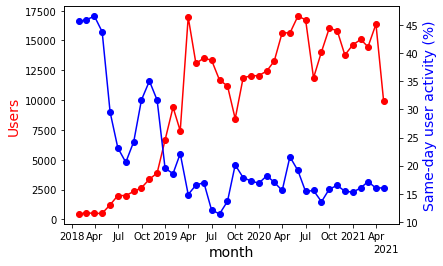

In [28]:
figure, axes = plt.subplots()

axes.plot(dates3, array.values(), color="red", marker="o")

# set x-axis label
axes.set_xlabel("month",fontsize=14)
# set y-axis label
axes.set_ylabel("Users",color="red",fontsize=14)
ax2=axes.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dates3, percentages.values(),color="blue",marker="o")
ax2.set_ylabel("Same-day user activity (%)",color="blue",fontsize=14)
#plt.xticks(np.arange(0, len(x_axis)+1, 10))

axes.xaxis.set(
    major_locator = mdates.AutoDateLocator(minticks = 1,
                                           maxticks = 5),
)

locator = mdates.AutoDateLocator(minticks = 15,
                                 maxticks = 20)
formatter = mdates.ConciseDateFormatter(locator)

axes.xaxis.set_major_locator(locator)
axes.xaxis.set_major_formatter(formatter)

# save the plot as a file
figure.savefig('two_different_y_axis_for_single_python_plot_with_twinx2.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

plt.show()